In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
#data available at https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

df = pd.read_csv('Housing.csv')
df = pd.DataFrame(df)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [ ]:
df.drop(columns = 'furnishingstatus',inplace = True)

<Axes: >

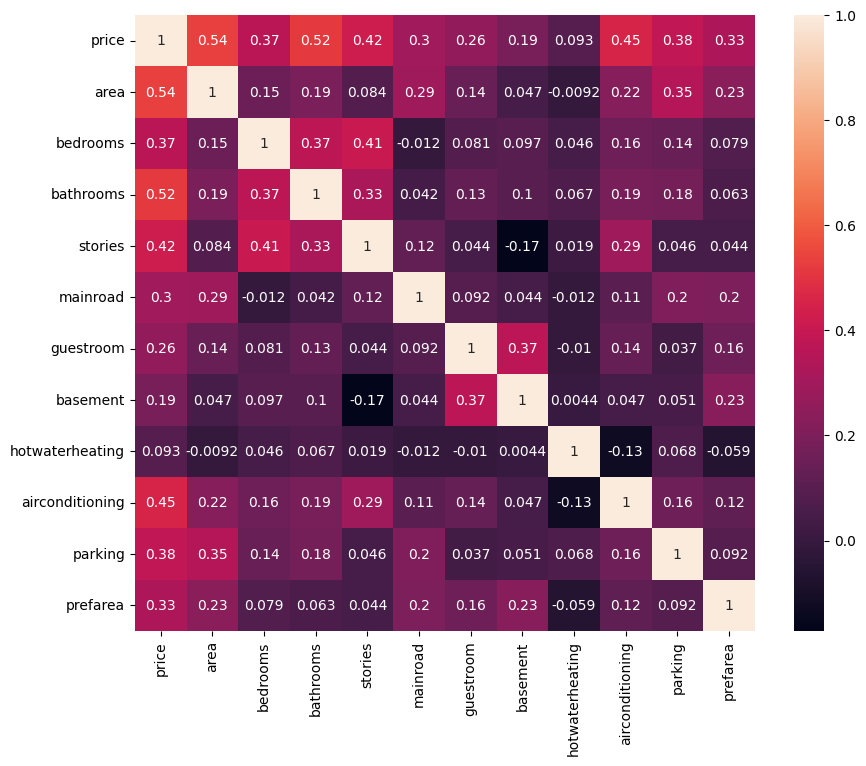

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = df[['area','bedrooms','bathrooms','parking','price']]

df.head()

,area,bedrooms,bathrooms,parking,price
0,7420,4,2,2,13300000
1,8960,4,4,3,12250000
2,9960,3,2,2,12250000
3,7500,4,2,3,12215000
4,7420,4,1,2,11410000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       545 non-null    int64
 1   bedrooms   545 non-null    int64
 2   bathrooms  545 non-null    int64
 3   parking    545 non-null    int64
 4   price      545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


In [ ]:
null_values = df.isnull().sum()
print("Total Null Values:")
print(null_values)

Total Null Values:
area         0
bedrooms     0
bathrooms    0
parking      0
price        0
dtype: int64


<Axes: >

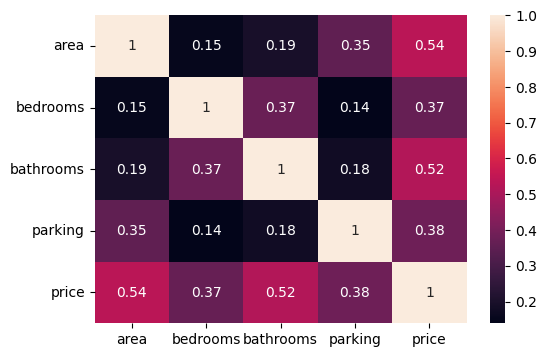

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True)

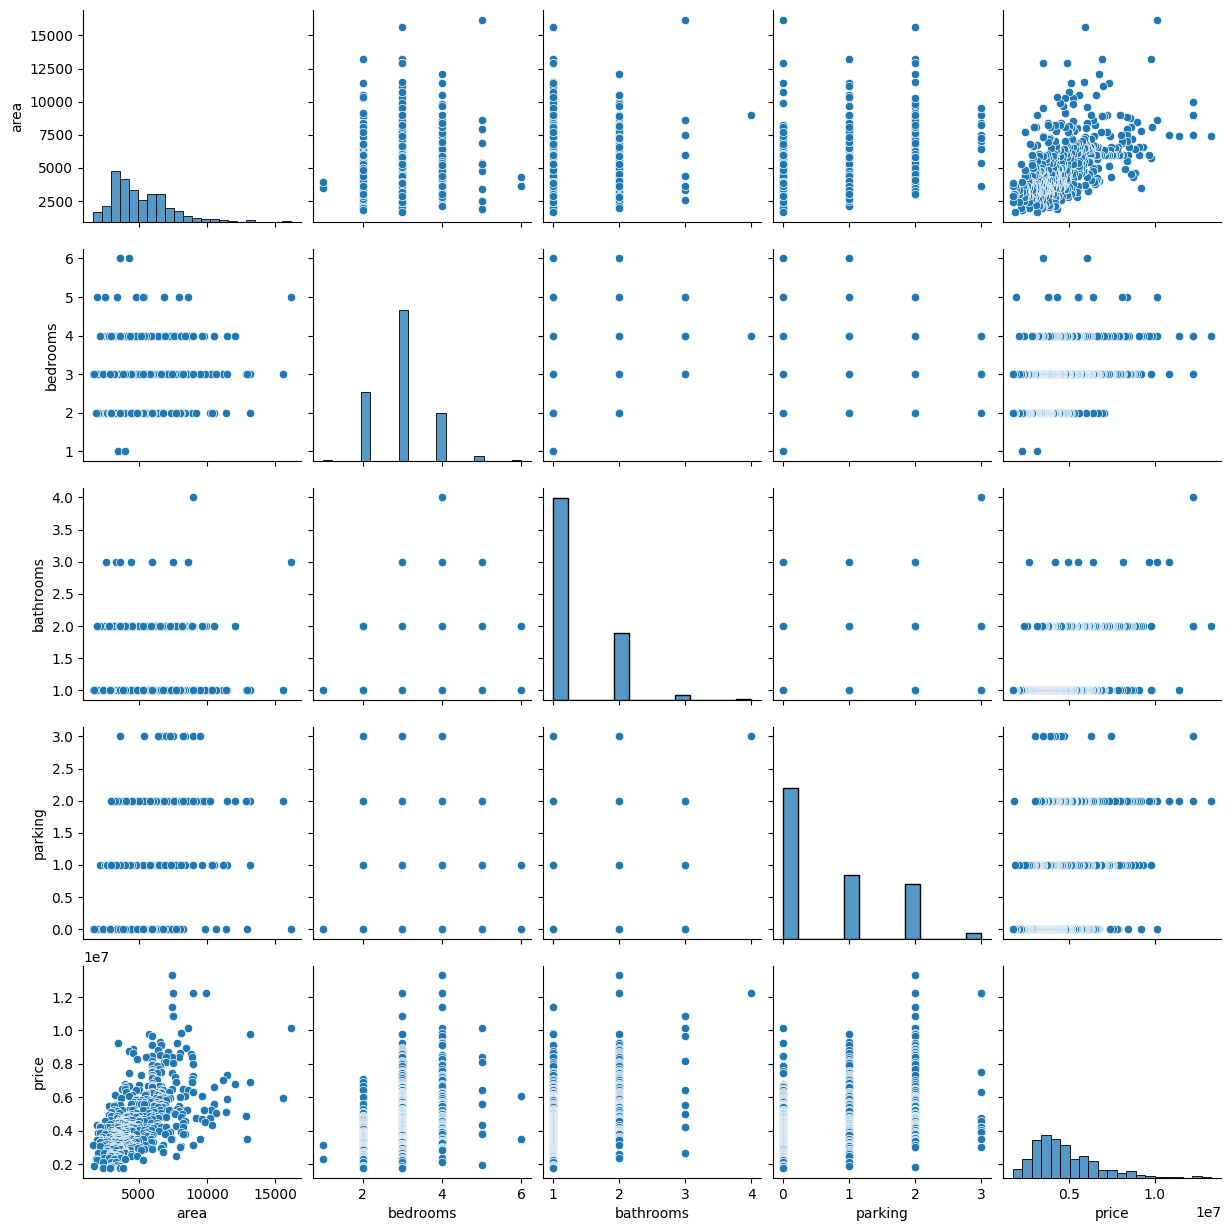

In [ ]:
sns.pairplot(df)

<ipython-input-12-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

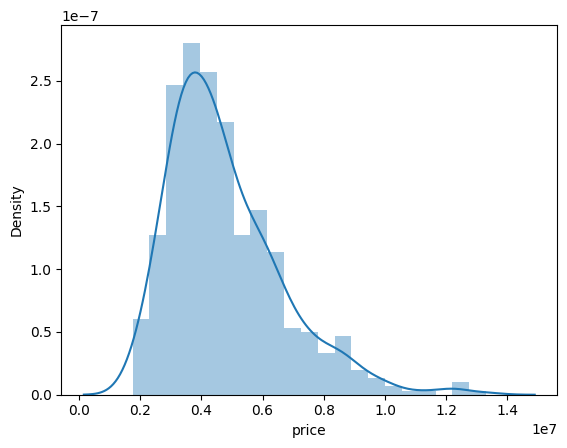

In [ ]:
sns.distplot(df['price'])

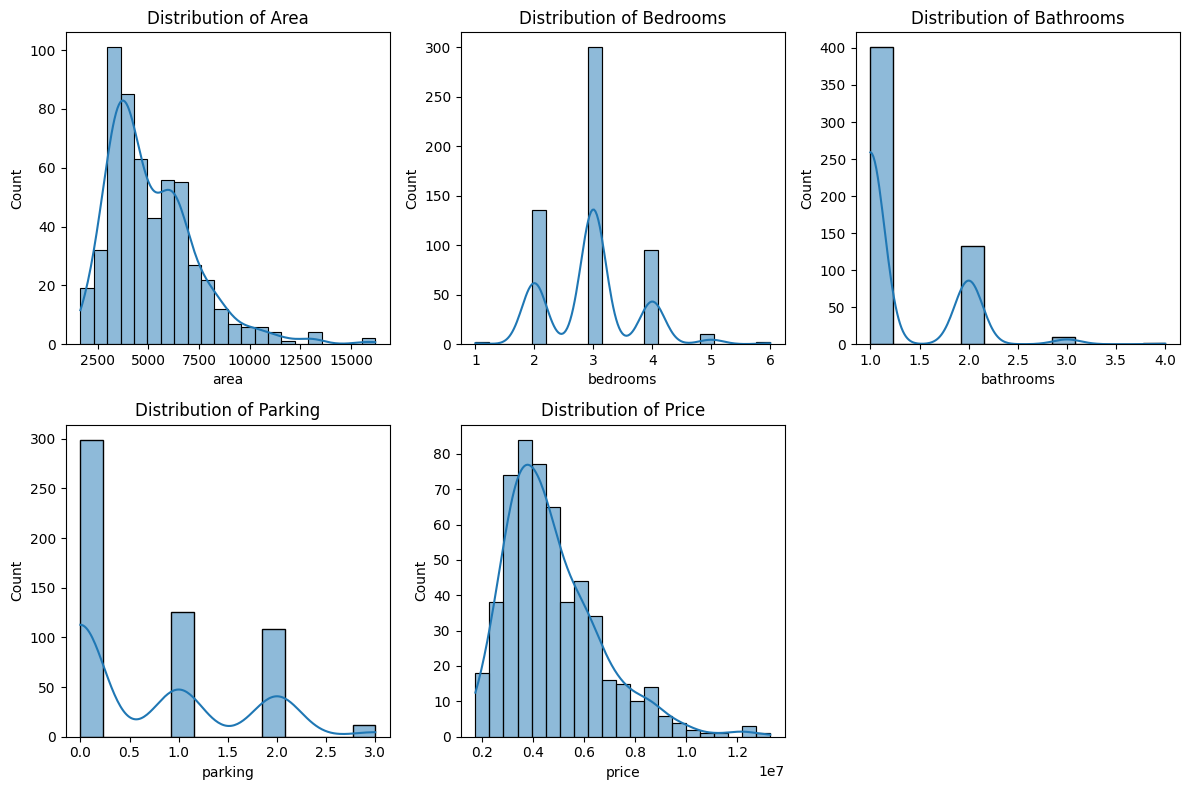

In [ ]:
# Plot histograms for area, bedrooms, bathrooms, parking, and price separately
plt.figure(figsize=(12, 8))
plt.subplot(231)
sns.histplot(df['area'], kde=True)
plt.title('Distribution of Area')
plt.subplot(232)
sns.histplot(df['bedrooms'], kde=True)
plt.title('Distribution of Bedrooms')
plt.subplot(233)
sns.histplot(df['bathrooms'], kde=True)
plt.title('Distribution of Bathrooms')
plt.subplot(234)
sns.histplot(df['parking'], kde=True)
plt.title('Distribution of Parking')
plt.subplot(235)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()


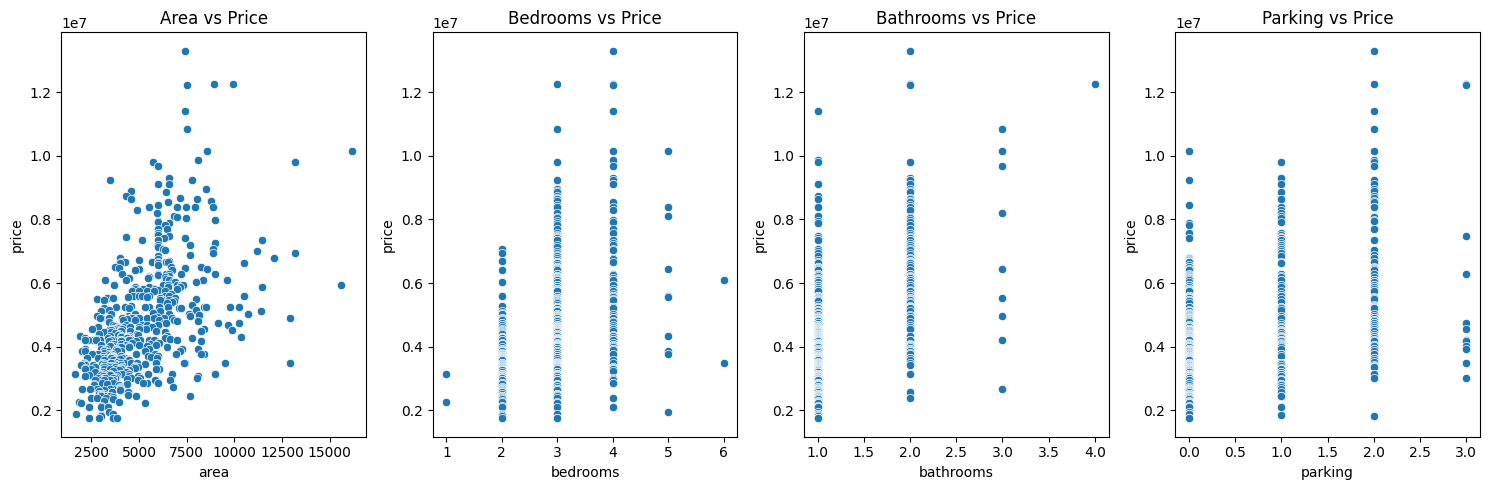

In [ ]:
# Create scatter plots for area vs price, bedrooms vs price, bathrooms vs price, and parking vs price
plt.figure(figsize=(15, 5))
plt.subplot(141)
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.subplot(142)
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Bedrooms vs Price')
plt.subplot(143)
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Bathrooms vs Price')
plt.subplot(144)
sns.scatterplot(x='parking', y='price', data=df)
plt.title('Parking vs Price')
plt.tight_layout()
plt.show()

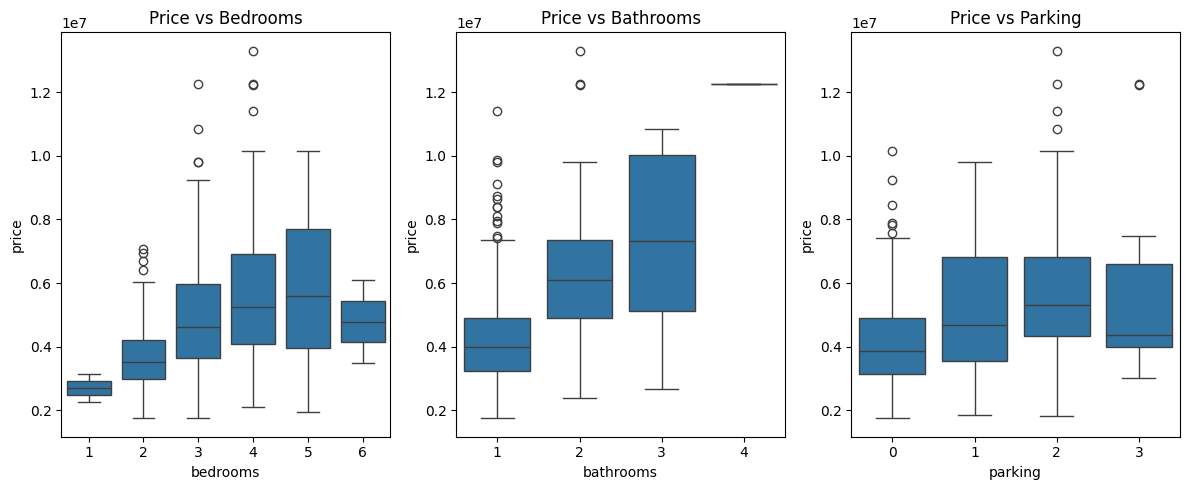

In [ ]:
# The scatterplot wasn't of much use, as it is not a continous data.
# To check for the number of Outliers
# Box plots for bedrooms, bathrooms, parking, and price
plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.subplot(132)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')
plt.subplot(133)
sns.boxplot(x='parking', y='price', data=df)
plt.title('Price vs Parking')
plt.tight_layout()
plt.show()

In [ ]:
# To find and remove the Outliers from the dataframe
# Defining my function called outliers
def outliers(df, col="price"):

    # Calculating q1, q3 and the inter-quartile range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Calculating the upper and lower bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Creating a list of the indices of the positions of the outliers
    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Returning ls
    return ls.tolist()

# Calling my function
outlier_list = outliers(df)

# Dropping the outliers from the dataset
df.drop(outlier_list, inplace=True)
print(f"The new shape of the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The new shape of the dataset has 530 rows and 5 columns


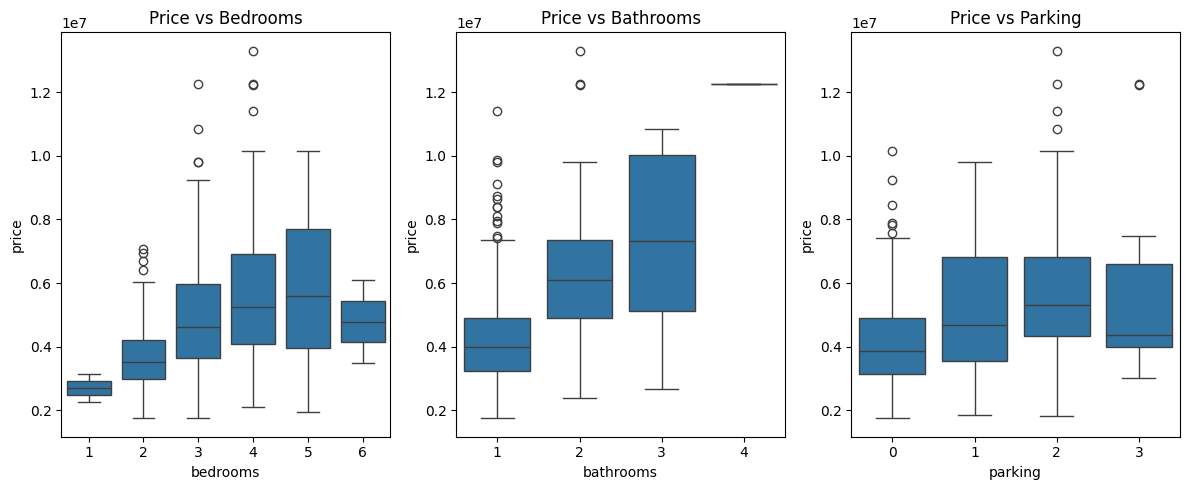

In [ ]:
# The scatterplot wasn't of much use, as it is not a continous data.
# To check for the number of Outliers
# Box plots for bedrooms, bathrooms, parking, and price
plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.subplot(132)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')
plt.subplot(133)
sns.boxplot(x='parking', y='price', data=df)
plt.title('Price vs Parking')
plt.tight_layout()
plt.show()

In [ ]:
X = df[['area','bedrooms','bathrooms','parking']]

y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

165750.28402639553


In [ ]:
predictions = model.predict(X_test)

In [ ]:
score = model.score(X_test, y_test)
print("R^2 Score:", score)

R^2 Score: 0.48658592708752046


In [ ]:
print(f"Model Score {round(model.score(X_test, y_test) * 100, 2)}%")

Model Score 48.66%


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1193395.729181687
MSE: 2365938956792.1074
RMSE: 1538160.9008137307


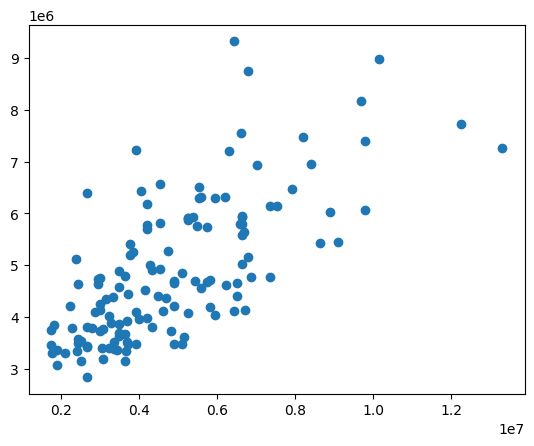

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
y_test_metrics = y_test.values.reshape(-1,1)
data_fram = pd.DataFrame({'actual': y_test_metrics.flatten(), 'predicted': predictions.flatten()})
pd.options.display.float_format = '{:.2f}'.format
data_fram.head(10)

,actual,predicted
0,4060000,6439922.88
1,6650000,5950961.23
2,3710000,3476688.77
3,6440000,4116857.59
4,2800000,3787249.37
5,4900000,4661978.87
6,5250000,5918864.94
7,4543000,5808310.54
8,2450000,3566349.15
9,3353000,3387916.34


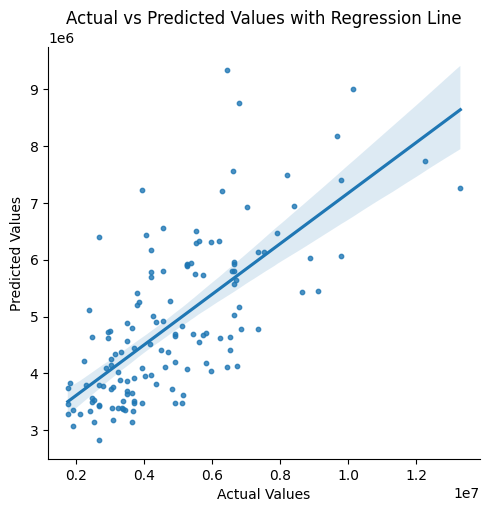

In [ ]:
plot_data = pd.DataFrame({'actual': y_test_metrics.flatten(), 'predicted': predictions.flatten()})

sns.lmplot(x='actual', y='predicted', data=plot_data, scatter_kws={'s': 10})
plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

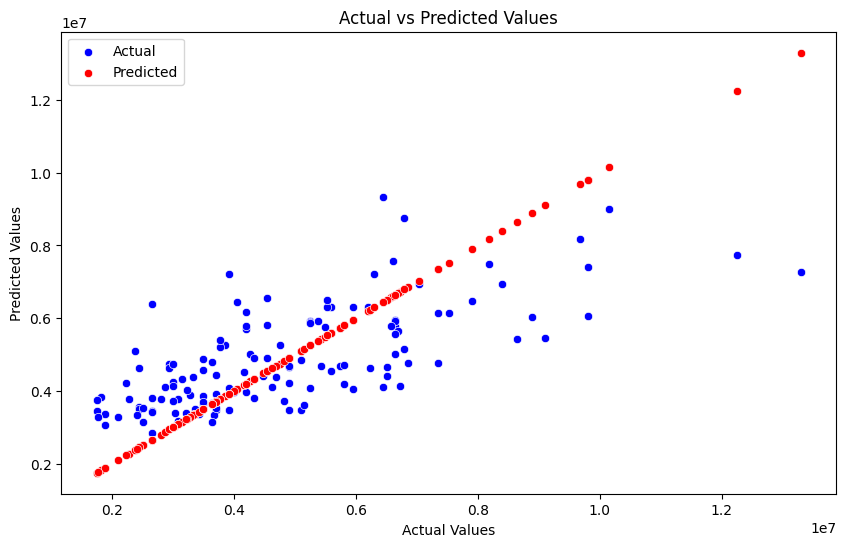

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual', y='predicted', data=plot_data, color='blue', label='Actual')
sns.scatterplot(x='actual', y='actual', data=plot_data, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()